In [ ]:
!pip install ucimlrepo
!pip install jupyter nbconvert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 59.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.16.0
    Uninstalling jupyter-server-1.16.0:
      Successfully uninstalled jupyter-server-1.16.0


In [ ]:

from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# metadata
print(infrared_thermography_temperature.metadata)

# variable information
print(infrared_thermography_temperature.variables)


{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

In [ ]:
y.head()

,aveOralF,aveOralM
0,36.85,36.59
1,37.00,37.19
2,37.20,37.34
3,36.85,37.09
4,36.80,37.04


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gender       1020 non-null   object 
 1   Age          1020 non-null   object 
 2   Ethnicity    1020 non-null   object 
 3   T_atm        1020 non-null   float64
 4   Humidity     1020 non-null   float64
 5   Distance     1018 non-null   float64
 6   T_offset1    1020 non-null   float64
 7   Max1R13_1    1020 non-null   float64
 8   Max1L13_1    1020 non-null   float64
 9   aveAllR13_1  1020 non-null   float64
 10  aveAllL13_1  1020 non-null   float64
 11  T_RC1        1020 non-null   float64
 12  T_RC_Dry1    1020 non-null   float64
 13  T_RC_Wet1    1020 non-null   float64
 14  T_RC_Max1    1020 non-null   float64
 15  T_LC1        1020 non-null   float64
 16  T_LC_Dry1    1020 non-null   float64
 17  T_LC_Wet1    1020 non-null   float64
 18  T_LC_Max1    1020 non-null   float64
 19  RCC1  

In [ ]:
X['Gender'].value_counts()

,count
Gender,
Female,606
Male,414


In [ ]:
X['Age'].value_counts()

,count
Age,
18-20,534
21-25,355
26-30,67
31-40,31
51-60,11
21-30,10
41-50,9
>60,3


In [ ]:

X['Ethnicity'].value_counts()

,count
Ethnicity,
White,506
Asian,260
Black or African-American,143
Hispanic/Latino,57
Multiracial,50
American Indian or Alaskan Native,4


In [ ]:

from sklearn.preprocessing import StandardScaler

# Separate categorical and numerical columns
categorical_columns = ['Age', 'Ethnicity', 'Gender']
X_categorical = X[categorical_columns]
X_numerical = X.drop(columns=categorical_columns)

# Initialize and apply StandardScaler only to numerical columns
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(X_numerical)
X_numerical_scaled = pd.DataFrame(X_numerical_scaled, columns=X_numerical.columns)

# One-Hot Encoding
X_categorical_encoded= pd.get_dummies(X_categorical, drop_first=True).astype(int)  # Avoid multicollinearity

# Combine the scaled numerical data with the encoded categorical data
X = pd.concat([X_categorical_encoded, X_numerical_scaled], axis=1)

print(X)


      Age_21-25  Age_21-30  Age_26-30  Age_31-40  Age_41-50  Age_51-60  \
0             0          0          0          0          1          0   
1             0          0          0          1          0          0   
2             0          1          0          0          0          0   
3             0          1          0          0          0          0   
4             0          0          0          0          0          0   
...         ...        ...        ...        ...        ...        ...   
1015          1          0          0          0          0          0   
1016          1          0          0          0          0          0   
1017          0          0          0          0          0          0   
1018          0          0          1          0          0          0   
1019          0          0          0          0          0          0   

      Age_>60  Ethnicity_Asian  Ethnicity_Black or African-American  \
0           0                0          

In [ ]:

missing_values = X[X.isna().any(axis=1)]
print(missing_values)
X.dropna(inplace=True)
y = y.loc[X.index]

     Age_21-25  Age_21-30  Age_26-30  Age_31-40  Age_41-50  Age_51-60  \
902          0          0          0          0          0          0   
903          0          0          0          0          0          0   

     Age_>60  Ethnicity_Asian  Ethnicity_Black or African-American  \
902        0                0                                    0   
903        0                0                                    0   

     Ethnicity_Hispanic/Latino  ...   T_FHCC1   T_FHRC1   T_FHLC1   T_FHBC1  \
902                          0  ...  0.001688  0.242449  0.161662  0.329170   
903                          0  ... -1.690689 -1.461379 -1.069301 -2.059495   

      T_FHTC1  T_FH_Max1  T_FHC_Max1    T_Max1     T_OR1  T_OR_Max1  
902  0.264590  -0.060309    0.170828 -0.157218  0.110882   0.101465  
903 -1.685099  -1.058931   -1.062320  0.509002  0.423950   0.432388  

[2 rows x 43 columns]


In [ ]:

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1018 entries, 0 to 1019
Data columns (total 43 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age_21-25                            1018 non-null   int64  
 1   Age_21-30                            1018 non-null   int64  
 2   Age_26-30                            1018 non-null   int64  
 3   Age_31-40                            1018 non-null   int64  
 4   Age_41-50                            1018 non-null   int64  
 5   Age_51-60                            1018 non-null   int64  
 6   Age_>60                              1018 non-null   int64  
 7   Ethnicity_Asian                      1018 non-null   int64  
 8   Ethnicity_Black or African-American  1018 non-null   int64  
 9   Ethnicity_Hispanic/Latino            1018 non-null   int64  
 10  Ethnicity_Multiracial                1018 non-null   int64  
 11  Ethnicity_White                    

In [83]:
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from xgboost import XGBRegressor, plot_importance
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

Feature Non-Linearity: Linear Regression assumes a linear relationship between the features and target, which is likely not the case in your dataset.   

Feature Importances for oralF: [0.00595307 0.00658335 0.50222045 0.48524313]
Feature Importances for oralM: [0.02976537 0.03291675 2.51110224 2.42621564]


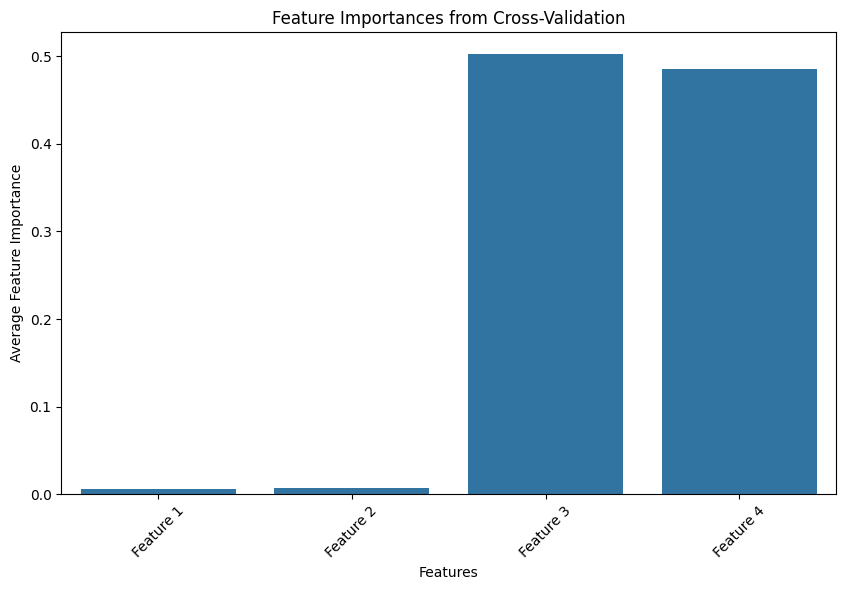

In [86]:
# Apply LabelEncoder for the categorical target variables
y['aveOralF'] = LabelEncoder().fit_transform(y['aveOralF'])
y['aveOralM'] = LabelEncoder().fit_transform(y['aveOralM'])

# Define 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize an empty list to store feature importance
feature_importancesF = np.zeros(X.shape[1])
feature_importancesM = np.zeros(X.shape[1])

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Define scoring metric
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

yF = y['aveOralF']
yM = y['aveOralM']


X, yF = load_iris(return_X_y=True)
X, yM = load_iris(return_X_y=True)

for train_idx, val_idx in cv.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    yF_train, yF_val = yF[train_idx], yF[val_idx]

    # Fit the model
    rf_model.fit(X_train, yF_train)

    # Add the feature importances from this fold
    feature_importancesF += rf_model.feature_importances_

for train_idx, val_idx in cv.split(X):
    X_train, X_val = X[train_idx], X[val_idx]
    yM_train, yM_val = yM[train_idx], yM[val_idx]

    # Fit the model
    rf_model.fit(X_train, yM_train)

    # Add the feature importances from this fold
    feature_importancesM += rf_model.feature_importances_


# Average feature importance across all folds
feature_importancesF /= cv.get_n_splits()

# Print or plot feature importances
print("Feature Importances for oralF:", feature_importancesF)
print("Feature Importances for oralM:", feature_importancesM)


plt.figure(figsize=(10, 6))
sns.barplot(x=np.arange(len(feature_importancesF)), y=feature_importancesF)
plt.xticks(np.arange(len(feature_importancesF)), [f"Feature {i+1}" for i in range(X.shape[1])], rotation=45)
plt.title('Feature Importances from Cross-Validation')
plt.xlabel('Features')
plt.ylabel('Average Feature Importance')
plt.show()

In [93]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

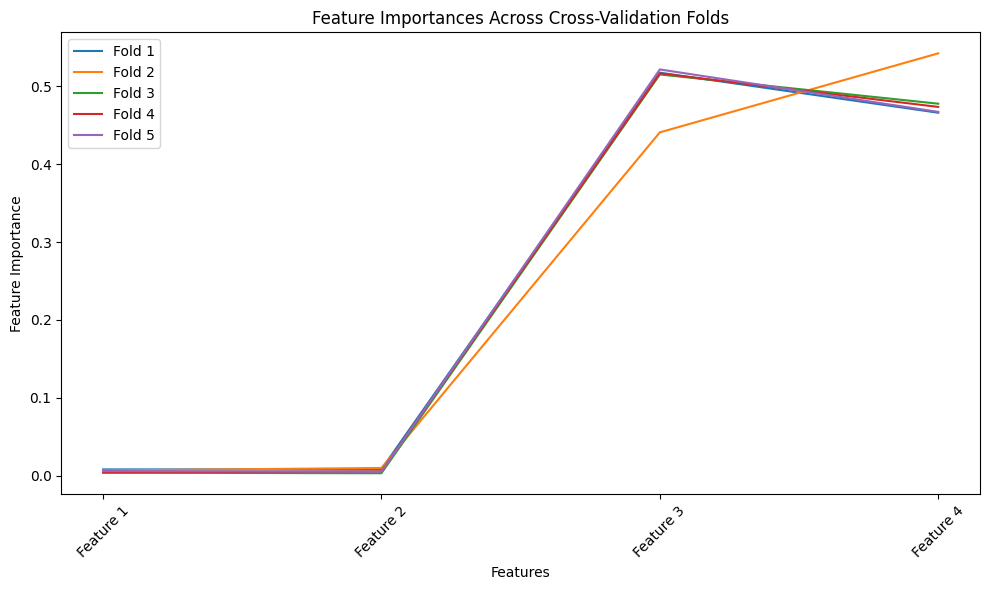

In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris  # Example dataset
import seaborn as sns

# Load dataset (use your own dataset instead)
X, yF = load_iris(return_X_y=True)  # Replace with your data (X and y)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Store feature importances for each fold
feature_importances_foldsF = []

# Perform cross-validation
for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X)):
    X_train, X_val = X[train_idx], X[val_idx]
    yF_train, yF_val = yF[train_idx], yF[val_idx]

    # Fit the model
    rf_model.fit(X_train, yF_train)

    # Get feature importances for this fold
    feature_importances_foldsF.append(rf_model.feature_importances_)

# Convert list to numpy array for easier manipulation
feature_importances_foldsF = np.array(feature_importances_foldsF)

# Plot feature importances for each fold
plt.figure(figsize=(10, 6))
x = np.arange(X.shape[1])  # Feature indices
for i in range(feature_importances_foldsF.shape[0]):
    plt.plot(x, feature_importances_foldsF[i], label=f"Fold {i+1}")

# Customize plot
plt.xticks(x, [f"Feature {i+1}" for i in range(X.shape[1])], rotation=45)
plt.title('Feature Importances Across Cross-Validation Folds')
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.legend()
plt.tight_layout()
plt.show()


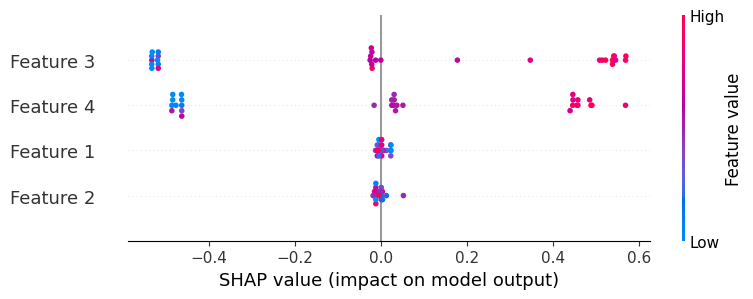

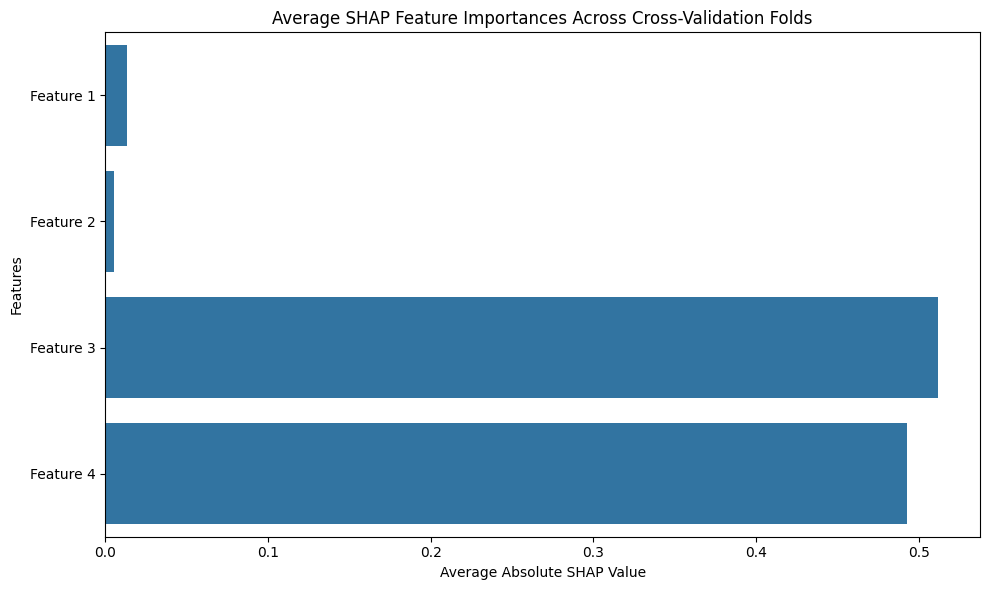

In [91]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris  # Example dataset
import seaborn as sns

# Load dataset (replace with your own dataset)
X, y = load_iris(return_X_y=True)  # Replace with your data (X and y)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize SHAP explainer and feature importance storage
shap_values_all_foldsF = []

# Perform cross-validation
for fold_idx, (train_idx, val_idx) in enumerate(cv.split(X)):
    X_train, X_val = X[train_idx], X[val_idx]
    yF_train, yF_val = yF[train_idx], yF[val_idx]

    # Fit the model
    rf_model.fit(X_train, yF_train)

    # Create SHAP explainer for this fold
    explainer = shap.TreeExplainer(rf_model)

    # Calculate SHAP values for the validation set (or training set)
    shap_values = explainer.shap_values(X_val)

    # Store SHAP values for later visualization
    shap_values_all_foldsF.append(shap_values)

# Plot SHAP summary plot for feature importance (using the first fold's SHAP values)
shap.summary_plot(shap_values_all_foldsF[0], X_val, feature_names=[f"Feature {i+1}" for i in range(X.shape[1])])

# Alternatively, plot the average SHAP values across folds for each feature
# Aggregate SHAP values across all folds
avg_shap_values = np.mean(np.abs(np.array([s[0] for s in shap_values_all_foldsF])), axis=0)

# Plot feature importances based on average SHAP values
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_shap_values, y=[f"Feature {i+1}" for i in range(X.shape[1])])
plt.title('Average SHAP Feature Importances Across Cross-Validation Folds')
plt.xlabel('Average Absolute SHAP Value')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


In [ ]:

## Linear regression
# Cross-validation for aveOralF
lr_mse_F = cross_val_score(lr_model, X, yF, cv=cv, scoring=mse_scorer)
lr_r2_F = cross_val_score(lr_model, X, yF, cv=cv, scoring=r2_scorer)
print(f"Linear Regression MSE for aveOralF: {-lr_mse_F.mean()}")
print(f"Linear Regression R^2 for aveOralF: {-lr_r2_F.mean()}")

# Cross-validation for aveOralM
lr_mse_M = cross_val_score(lr_model, X, yM, cv=cv, scoring=mse_scorer)
lr_r2_M = cross_val_score(lr_model, X, yM, cv=cv, scoring=r2_scorer)
print(f"Linear Regression MSE for aveOralM: {-lr_mse_M.mean()}")
print(f"Linear Regression R^2 for aveOralM: {-lr_r2_M.mean()}")

In [ ]:
XyF = pd.concat([X, yF], axis=1)
XyM = pd.concat([X, yM], axis=1)

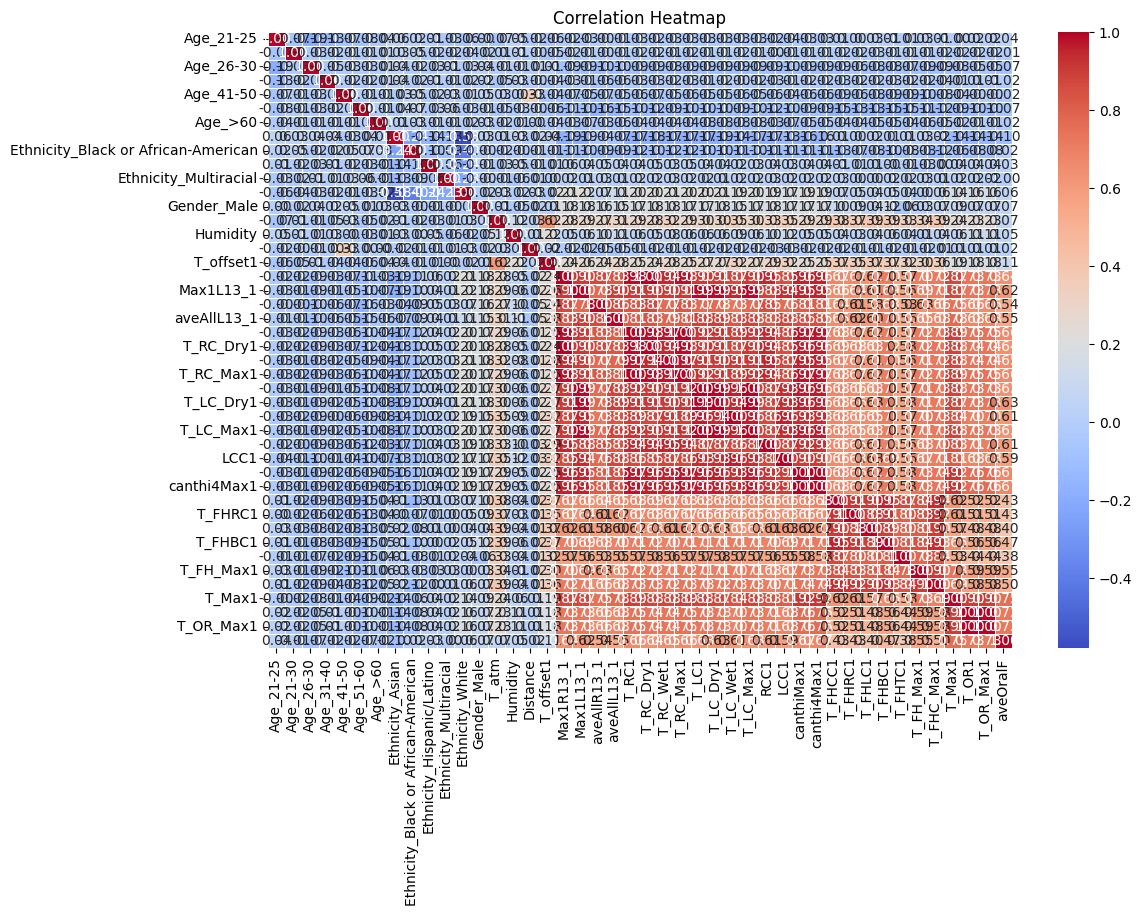

In [ ]:
correlation_threshold = 0.85

correlation_matrix = XyF.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix = XyF.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > correlation_threshold)]
print(f"Highly correlated columns to drop: {to_drop}")

data_reduced = XyF.drop(columns=to_drop)

print(f"Reduced dataset shape: {data_reduced.shape}")

plt.figure(figsize=(12, 8))
sns.heatmap(data_reduced.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Highly correlated columns to drop: ['Max1L13_1', 'aveAllR13_1', 'aveAllL13_1', 'T_RC1', 'T_RC_Dry1', 'T_RC_Wet1', 'T_RC_Max1', 'T_LC1', 'T_LC_Dry1', 'T_LC_Wet1', 'T_LC_Max1', 'RCC1', 'LCC1', 'canthiMax1', 'canthi4Max1', 'T_FHRC1', 'T_FHLC1', 'T_FHBC1', 'T_FHTC1', 'T_FHC_Max1', 'T_Max1', 'T_OR1', 'T_OR_Max1']
Reduced dataset shape: (1018, 21)


Feature Interaction: Linear models don't naturally capture complex feature interactions or non-linear patterns.

Non-Linearity Handling: Random Forests are capable of modeling non-linear relationships.  
Feature Importance: They capture interactions between features without requiring explicit feature engineering.  
Outlier Resistance: They are less sensitive to outliers and noise.


In [ ]:

# Cross-validation for aveOralF
rf_mse_F = cross_val_score(rf_model, X, yF, cv=cv, scoring=mse_scorer)
rf_r2_F = cross_val_score(rf_model, X, yF, cv=cv, scoring=r2_scorer)
print(f"Random Forest MSE for aveOralF: {-rf_mse_F.mean()}")
print(f"Random Forest R^2 for aveOralF: {-rf_r2_F.mean()}")

# Cross-validation for aveOralM
rf_mse_M = cross_val_score(rf_model, X, yM, cv=cv, scoring=mse_scorer)
rf_r2_M = cross_val_score(rf_model, X, yM, cv=cv, scoring=r2_scorer)
print(f"Random Forest MSE for aveOralM: {-rf_mse_M.mean()}")
print(f"Random Forest R^2 for aveOralM: {-rf_r2_M.mean()}")


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}


# Random Forest MSE for aveOralF: 18.73540058195692
# Random Forest R^2 for aveOralF: -0.5833172507956826
# Random Forest MSE for aveOralM: 23.20150126485077
# Random Forest R^2 for aveOralM: -0.734641490471828

Random Forest MSE for aveOralF: 18.73540058195692
Random Forest R^2 for aveOralF: -0.5833172507956826
Random Forest MSE for aveOralM: 23.20150126485077
Random Forest R^2 for aveOralM: -0.7346414904718283


# Classification (37.5C)

Check for fever, if oralF/ OralM is over 37.5 then fever if not, not fever

In [ ]:
# Define the fever threshold
threshold = 37.5

# Convert aveOralF and aveOralM to binary categorical variables
y1= y['aveOralF'].apply(lambda x: 1 if x >= threshold else 0)
y2 = y['aveOralM'].apply(lambda x: 1 if x >= threshold else 0)

display(y1[y1.isna().any(axis=1)])
display(y2[y2.isna().any(axis=1)])

# Convert to string labels ('fever' or 'not_fever')
# y['aveOralF'] = y['aveOralF'].replace({1: 'fever', 0: 'not_fever'})
# y['aveOralM'] = y['aveOralM'].replace({1: 'fever', 0: 'not_fever'})
print(y1)
print(y2)



ValueError: No axis named 1 for object type Series

In [ ]:
# Check the transformed y for correct tranformation
print(y1[y1 == 1])
print(y2[y2 == 1])

# split y dataframe (2 columns) into two dataframes y1 and y2
y1 = pd.DataFrame(y1, columns=['aveOralF'])
y2 = pd.DataFrame(y2, columns=['aveOralM'])
# Convert y to 1D
y1 = y1.values.ravel()
y2 = y2.values.ravel()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Re-split the data for y1('aveOralF')
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.33, random_state=42)

# Initialise the logistic regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y1_train)

# Predict on the test set
y1_pred = lr_model.predict(X_test)

print(f"aveOralF Accuracy: {accuracy_score(y1_test, y1_pred)}")
print(classification_report(y1_test, y1_pred))

# Re-split the data for y2('aveOralM')
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.33, random_state=42)

# Initialise the logistic regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, y2_train)

# Predict on the test set
y2_pred = lr_model.predict(X_test)

print(f"aveOralM Accuracy: {accuracy_score(y2_test, y2_pred)}")
print(classification_report(y2_test, y2_pred))



In [ ]:

# Initialize and train Random Forest for Multi-Output Regression
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y1_train)

# Make predictions
y1_pred = rf_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y1_test, y1_pred)

# Define custom axis labels
labels = ["Fever(Positive)", "Not Fever(Negative)"]

# Create a custom confusion matrix where TP is top-left, TN is bottom-right
conf_matrix_custom = [[conf_matrix[1, 1], conf_matrix[0, 1]],  # TP, FP
                      [conf_matrix[1, 0], conf_matrix[0, 0]]]  # FN, TN

print("Confusion Matrix AveOralF:\n", conf_matrix_custom)

# Plot the confusion matrix with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_custom, annot=True, fmt="d", cmap="Blues",
            yticklabels=labels, xticklabels=labels)

# Add axis labels and title
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model
print(f"Accuracy: {accuracy_score(y1_test, y1_pred)}")
print(classification_report(y1_test, y1_pred))

In [ ]:
# Initialize and train Random Forest for Multi-Output Regression
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y2_train)

# Make predictions
y1_pred = rf_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y2_test, y2_pred)

# Define custom axis labels
labels = ["Fever(Positive)", "Not Fever(Negative)"]

# Create a custom confusion matrix where TP is top-left, TN is bottom-right
conf_matrix_custom = [[conf_matrix[1, 1], conf_matrix[0, 1]],  # TP, FP
                      [conf_matrix[1, 0], conf_matrix[0, 0]]]  # FN, TN

print("Confusion Matrix AveOralF:\n", conf_matrix_custom)

# Plot the confusion matrix with labeled axes
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_custom, annot=True, fmt="d", cmap="Blues",
            yticklabels=labels, xticklabels=labels)

# Add axis labels and title
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# Evaluate the model
print(f"Accuracy: {accuracy_score(y2_test, y2_pred)}")
print(classification_report(y2_test, y2_pred))